In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np

In [ ]:
all = pd.read_csv('/content/drive/MyDrive/all_features.csv')

In [ ]:
selected = pd.read_csv('/content/drive/MyDrive/selected_features.csv')

In [ ]:
all.columns

Index(['DATE', 'GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)',
       '국고채(10년)(%)', '뉴스심리지수', '경제심리지수', '수출금액지수', '수입금액지수', '수출물가지수(원화기준)',
       '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)', '수입물가지수(계약통화기준)',
       '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리',
       'CD(91일)', '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI',
       '원/미국달러(매매기준율)', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ', '미국CPI',
       '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률',
       '미국실업률', '중국위안/달러', '장단기금리차'],
      dtype='object')

In [ ]:
selected.columns

Index(['DATE', 'KOSPI', '기준금리', '수출물가지수(원화기준)', '수입물가지수(원화기준)', 'PPI', '한국실업률',
       '금', '은', '원유', '중국위안/달러', 'NASDAQ', '외환보유액(천달러)', '미국PPI', '뉴스심리지수',
       '대외채무', '본원 통화(달러 발행량)', 'CPI', '장단기금리차', 'GDP_GROWTH(%)',
       '원/미국달러(매매기준율)'],
      dtype='object')

selected 다중회귀

In [ ]:
for col in selected.columns:
    if col != 'DATE' and selected[col].dtype == 'object':
        selected[col] = selected[col].str.replace(',', '')
        selected[col] = pd.to_numeric(selected[col], errors='coerce')

In [ ]:
# 문자열 날짜 → datetime으로 변환
selected['DATE'] = pd.to_datetime(selected['DATE'], errors='coerce')

# 날짜를 숫자로 변환 (1970-01-01부터 며칠이 지났는지)
selected['DATE_NUM'] = (selected['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# 필요 없는 원래 DATE 문자열 컬럼 제거
selected = selected.drop(columns=['DATE'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 타겟 설정
target_col = '원/미국달러(매매기준율)'

# 특성과 타겟 분리
X = selected.drop(columns=[target_col])
y = selected[target_col]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Selected 다중선형회귀모델")
print(f"MSE: {mse:}")
print(f"RMSE: {rmse:}")
print(f"R² Score: {r2:}")

Selected 다중선형회귀모델
MSE: 5888.990155127816
RMSE: 76.73975602728886
R² Score: 0.31971888881180066


all 다중회귀

In [ ]:
for col in all.columns:
    if col != 'DATE' and all[col].dtype == 'object':
        all[col] = all[col].str.replace(',', '')
        all[col] = pd.to_numeric(all[col], errors='coerce')

In [ ]:
# 문자열 날짜 → datetime으로 변환
all['DATE'] = pd.to_datetime(all['DATE'], errors='coerce')

# 날짜를 숫자로 변환 (1970-01-01부터 며칠이 지났는지)
all['DATE_NUM'] = (all['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# 필요 없는 원래 DATE 문자열 컬럼 제거
all = all.drop(columns=['DATE'])

In [ ]:
# 타겟 설정
target_col = '원/미국달러(매매기준율)'

# 특성과 타겟 분리
X = all.drop(columns=[target_col])
y = all[target_col]

# 학습/테스트 분할 (여전히 테스트셋은 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Ridge 모델 생성 (alpha는 규제 강도, 적당히 1.0으로 설정)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.3938e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [ ]:
# 예측
y_pred = ridge_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ridge 다중선형회귀모델")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Ridge 다중선형회귀모델
MSE: 241.84984500358536
RMSE: 15.55152227287044
R² Score: 0.972062123222184


In [ ]:
# 기존 모델 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Train, Test 예측
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# 성능 평가 함수
def evaluate_performance(y_true, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n[{dataset_name}]")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")

# Train/Test 모두 평가
evaluate_performance(y_train, y_train_pred, dataset_name="Train")
evaluate_performance(y_test, y_test_pred, dataset_name="Test")


[Train]
MSE : 247.9492
RMSE: 15.7464
R²  : 0.9747

[Test]
MSE : 241.8498
RMSE: 15.5515
R²  : 0.9721


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.3938e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 타겟 설정
target_col = '원/미국달러(매매기준율)'
X = all.drop(columns=[target_col])
y = all[target_col]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# 과적합 방지를 위한 alpha 튜닝
param_grid = {'alpha': np.logspace(-3, 3, 20)}  # alpha 0.001 ~ 1000
cv = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"최적의 alpha 값: {best_alpha}")

# 최적 alpha로 다시 학습
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# 예측
y_pred = ridge_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n[최종 Ridge 모델 성능]")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

최적의 alpha 값: 0.004281332398719396

[최종 Ridge 모델 성능]
MSE: 212.6010
MAE: 11.4183
RMSE: 14.5808
R²: 0.9754


In [ ]:
# 타겟 및 특성 분리
target_col = '원/미국달러(매매기준율)'
X = all.drop(columns=[target_col])
y = all[target_col]

# TimeSeriesSplit 객체 생성 (예: 5등분)
tscv = TimeSeriesSplit(n_splits=5)

mse_list = []
rmse_list = []
mae_list = []
r2_list = []

# Ridge 모델 준비
ridge_model = Ridge(alpha=1.0)

# 시계열 교차검증
for fold, (train_index, test_index) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"[Fold {fold}] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# 최종 평균 성능 출력
print("\n[최종 평균 성능]")
print(f"평균 MSE: {np.mean(mse_list):.4f}")
print(f"평균 RMSE: {np.mean(rmse_list):.4f}")
print(f"평균 MAE: {np.mean(mae_list):.4f}")
print(f"평균 R²: {np.mean(r2_list):.4f}")

[Fold 1] MSE: 25888.4725, RMSE: 160.8990, MAE: 142.2024, R²: -0.9816
[Fold 2] MSE: 710.2014, RMSE: 26.6496, MAE: 22.6991, R²: 0.6060
[Fold 3] MSE: 4036.5219, RMSE: 63.5336, MAE: 53.2714, R²: -1.4696
[Fold 4] MSE: 21292.6903, RMSE: 145.9202, MAE: 117.6171, R²: -13.2953
[Fold 5] MSE: 208.2332, RMSE: 14.4303, MAE: 10.9445, R²: 0.9585

[최종 평균 성능]
평균 MSE: 10427.2239
평균 RMSE: 82.2865
평균 MAE: 69.3469
평균 R²: -2.8364


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.43302e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.57143e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02072e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.12132e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

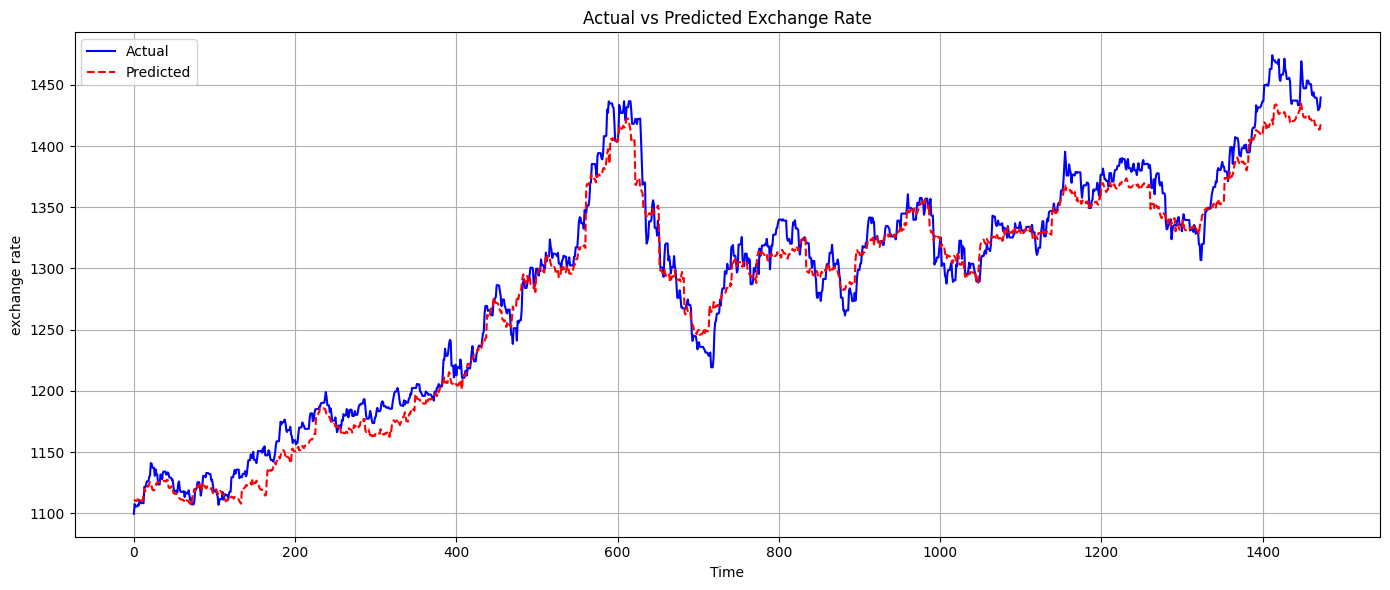

In [ ]:
import matplotlib.pyplot as plt

# 인덱스 초기화 (시각화를 위해)
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 실제값
plt.plot(y_test, label='Actual', color='blue')

# 예측값
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')

# 제목 및 레이블
plt.title('Actual vs Predicted Exchange Rate')
plt.xlabel('Time')
plt.ylabel('exchange rate')
plt.legend()

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.3938e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-4-052fc521613e>:55: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-052fc521613e>:55: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-052fc521613e>:55: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-052fc521613e>:55: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-052fc521613e>:55: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-052fc521613e>:55: UserWarning: Glyph 53552 (\N{HANGUL S

📊 Ridge 다중선형회귀모델 성능
MSE: 241.85
RMSE: 15.55
R² Score: 0.9721


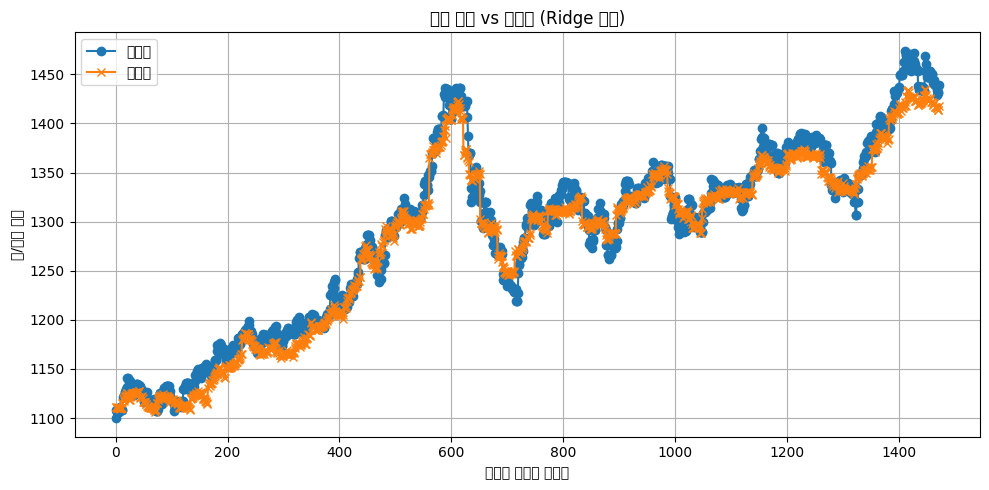

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 문자열 숫자 ',' 제거 및 숫자형 변환
for col in all.columns:
    if col != 'DATE' and all[col].dtype == 'object':
        all[col] = all[col].str.replace(',', '', regex=False)
        all[col] = pd.to_numeric(all[col], errors='coerce')

# 날짜 처리
all['DATE'] = pd.to_datetime(all['DATE'], errors='coerce')
all['DATE_NUM'] = (all['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
all = all.drop(columns=['DATE'])

# 결측치 제거
all = all.dropna()

# 타겟 설정
target_col = '원/미국달러(매매기준율)'
X = all.drop(columns=[target_col])
y = all[target_col]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ridge 회귀 모델 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 평가 출력
print("📊 Ridge 다중선형회귀모델 성능")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 예측 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='실제값', marker='o')
plt.plot(y_pred, label='예측값', marker='x')
plt.title('환율 예측 vs 실제값 (Ridge 회귀)')
plt.xlabel('테스트 데이터 인덱스')
plt.ylabel('원/달러 환율')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()